* criterion : 분류에 사용되는 기준 설정. 'gini'와 'entropy'가 있다.
* max_depth : Tree의 최대 depth를 설정. overfitting을 방지하기 위해 pruning 해야한다.
    * default='None' : 모든 node내의 관측치 갯수가 min_samples_split보다 작아졌을때 멈춘다.
* min_samples_split : 최하단 node에 있어야하는 관측치 갯수의 최솟값이다.
* min_impurity_decrease : 불순도의 감소가 넘어야하는 최솟값 설정. 이 값을 넘어야 나누어진다.
* min_impurity_split : 불순도가 이 값을 넘으면 Tree가 멈추도록 한다.

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image
import graphviz
import matplotlib.pyplot as plt

### Data preprocessing

In [72]:
iris=sns.load_dataset('iris')
X=iris.drop('species',axis=1)
y=iris['species'].values

classle=LabelEncoder()
y=classle.fit_transform(y)

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=1, stratify=y)

sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

### Fit and predict differing criterion and max_depth

In [134]:
print('---------------------------------------------')

for crit in ['gini','entropy']:
    for n in range(1,5):
        dtc=DecisionTreeClassifier(criterion=crit,
                                   min_samples_split=2, max_depth=n)
        dtc.fit(X_train_std,y_train)
        y_pred=dtc.predict(X_test_std)
        print('Accuracy with {} & max depth={} : {}'.
              format(crit,n,round(accuracy_score(y_test,y_pred),4)))
        
    print('---------------------------------------------')

---------------------------------------------
Accuracy with gini & max depth=1 : 0.6667
Accuracy with gini & max depth=2 : 0.9556
Accuracy with gini & max depth=3 : 0.9778
Accuracy with gini & max depth=4 : 0.9778
---------------------------------------------
Accuracy with entropy & max depth=1 : 0.6667
Accuracy with entropy & max depth=2 : 0.9556
Accuracy with entropy & max depth=3 : 0.9556
Accuracy with entropy & max depth=4 : 0.9333
---------------------------------------------


### max_depth=3

#### plot tree

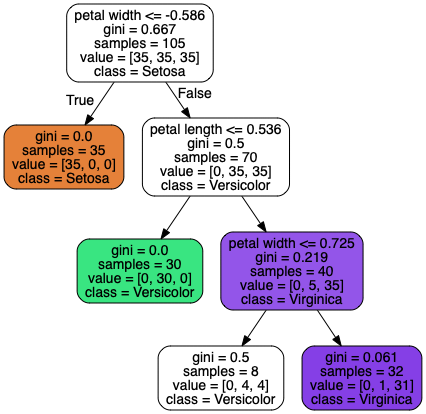

In [153]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=3)
dtc.fit(X_train_std,y_train)
y_pred=dtc.predict(X_test_std)

dot_data = export_graphviz(dtc, filled=True, rounded=True,
                           class_names=['Setosa', 'Versicolor', 'Virginica'], 
                           feature_names=['sepal length', 'sepal width',
                                          'petal length', 'petal width'],
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_max3.png')
Image(graph.create_png())

#### pairidx plot

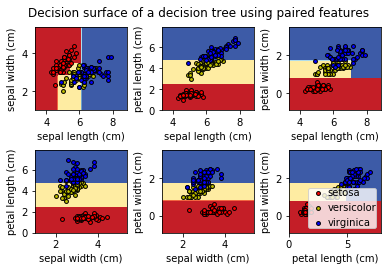

In [154]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

iris=load_iris()
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier(criterion='gini',max_depth=3).fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
fig=plt.gcf()
fig.savefig('sep_max3.png')

### max_depth=2

#### plot_tree

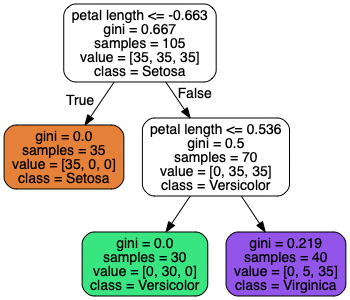

In [155]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=2)
dtc.fit(X_train_std,y_train)
y_pred=dtc.predict(X_test_std)

dot_data = export_graphviz(dtc, filled=True, rounded=True,
                           class_names=['Setosa', 'Versicolor', 'Virginica'], 
                           feature_names=['sepal length', 'sepal width',
                                          'petal length', 'petal width'],
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_max2.png')
Image(graph.create_png())

#### pairidx plot

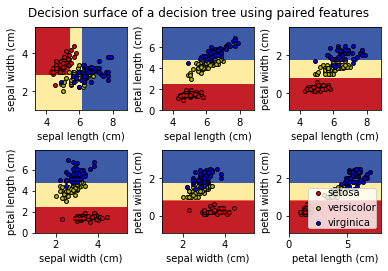

In [156]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

iris=load_iris()
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier(criterion='gini',max_depth=2).fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
fig=plt.gcf()
fig.savefig('sep_max2.png')